In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('fina_match.csv')

data_cleaned = data.dropna(subset=['GPA', 'GRE Verbal', 'GRE Writing', 'GRE Quantitive'])

data_cleaned['Decision'] = np.where(data_cleaned['Decision'] == 'Accepted', 1, 0)

ivy_league = ['brown university', 'columbia university', 'cornell university', 'harvard university', 
              'university of pennsylvania', 'princeton university', 'yale university']

impact_dict = {}

for university, group in data_cleaned.groupby('University'):
    if len(group) <= 5:
        continue
    
    X = group[['GPA', 'GRE Verbal', 'GRE Writing', 'GRE Quantitive']]
    y = group['Decision']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    impact = np.abs(model.params[1:])
    max_impact_feature = impact.idxmax()
    max_impact_value = impact.max()  # Get the max impact value
    
    impact_dict[university] = (max_impact_feature, max_impact_value)  # Store as a tuple

for university, (feature, value) in impact_dict.items():
    print(f"University: {university}, Max Impact Feature: {feature}, Value: {value}")

print('-----------------')
for each in ivy_league:
    print(f"University: {each}, Max Impact Feature: {impact_dict[each][0]}, Value: {impact_dict[each][1]}")
    

/var/folders/9y/7pjv730s7rxb75642xdtj1880000gn/T/ipykernel_83268/4101783526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Decision'] = np.where(data_cleaned['Decision'] == 'Accepted', 1, 0)


University: adelphi university, Max Impact Feature: GRE Writing, Value: 0.31774414396683215
University: adler school of professional psychology, Max Impact Feature: GRE Writing, Value: 0.28451338129102244
University: adler university, Max Impact Feature: GPA, Value: 0.579687716875936
University: american university, Max Impact Feature: GRE Writing, Value: 0.2967262931176486
University: appalachian state university, Max Impact Feature: GPA, Value: 0.638448444821758
University: arizona state university, Max Impact Feature: GPA, Value: 0.26211469447758773
University: auburn university, Max Impact Feature: GPA, Value: 0.15879516792407788
University: ball state university, Max Impact Feature: GPA, Value: 0.22818549760041634
University: baylor university, Max Impact Feature: GPA, Value: 0.40627700775438536
University: boston college, Max Impact Feature: GPA, Value: 0.2581801357645738
University: boston university, Max Impact Feature: GRE Writing, Value: 0.15306690898359954
University: bowlin

In [17]:
from collections import Counter

# a list of the most impactful features for each university
most_impactful_features = [feature for feature, _ in impact_dict.values()]

feature_counts = Counter(most_impactful_features)

print(feature_counts)



Counter({'GPA': 208, 'GRE Writing': 38, 'GRE Quantitive': 2})


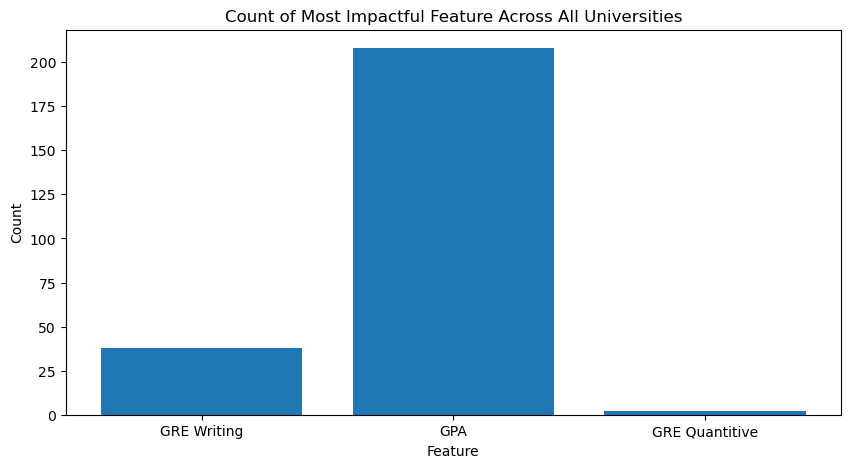

In [18]:
import matplotlib.pyplot as plt

features = list(feature_counts.keys())
counts = list(feature_counts.values())

plt.figure(figsize=(10,5))
plt.bar(features, counts)

plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Count of Most Impactful Feature Across All Universities')

plt.show()
